# 국제 상품 가격 데이터
파이썬에서 국제 원자재(금, 은, 구리, 원유)의 가격을 가져와 다루는 방법

* 국제 금가격 (LBM, 런던금은시장)
* 국제 은 가격 (LBMA, 런던 금시장협회)
* 국제 구리 가격 (LME, 런던 금속 거래소)
* 국제 원유가격 (서부 텍사스 중질유, 두바이유, 북해 브렌트유)

<img src="http://i.imgur.com/qVjtvea.png" >

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

- Use pandas_datareader(): Up-to-date remote data access function for pandas
- for more details, see the following:
  - https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [2]:
!pip install pandas_datareader

# 국제 금가격 (런던 금시장)
- Gold Fixing Price in London Bullion Market (based in U.S. Dollar)
  * (HSBC, 도이치은행 등) 5개 은행이 회의를 통해 Gold Fixing Price 발표
  * 하루에 두 번 (10:30 AM, 3:00 PM 런던시간)

- FRED (세인트루이스 연방준비은행 경제 데이터)
  - FRED changed URL structure for downloading CSV. (2022-09-30)

In [3]:
import pandas as pd
import pandas_datareader as pdr

<ipython-input-4-28a31b9d1c4a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df.head(3).append(df.tail(3)))


                  GDP
DATE                 
1947-01-01    243.164
1947-04-01    245.968
1947-07-01    249.585
2022-07-01  25723.941
2022-10-01  26137.992
2023-01-01  26529.774


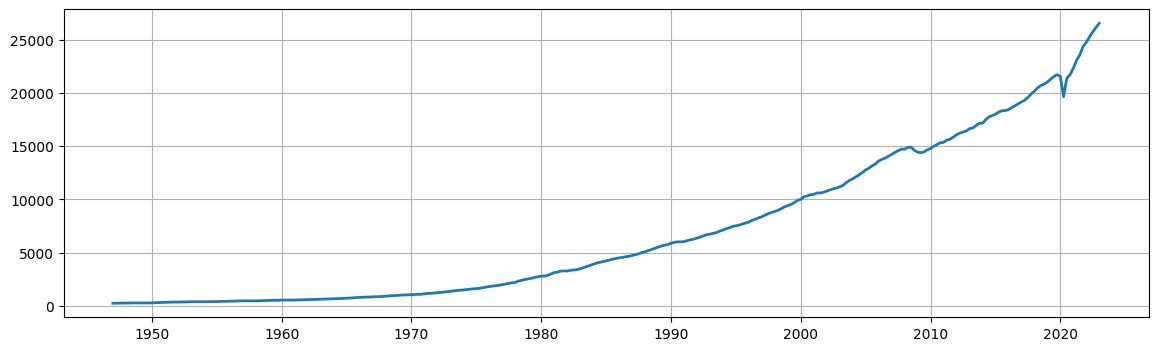

In [4]:
# using pandas_datareader

df = pdr.DataReader('GDP', 'fred', start='1947-01-01')
print(df.head(3).append(df.tail(3)))
plt.plot(df['GDP'])

In [5]:
# pd.datareader can read various data
df = pdr.data.DataReader('TUD', 'oecd')    # TUD (trade (or labor) union dataset) of oecd countries
df.head(10).T.sample(5)

SSLError: ignored

In [7]:
# or
df = pdr.get_data_fred('GDP', start='1947-01-01', )
df.head(3).append(df.tail(3))

<ipython-input-7-7b2b6c75fbf2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(3).append(df.tail(3))


,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
2022-07-01,25723.941
2022-10-01,26137.992
2023-01-01,26529.774


In [8]:
df.columns, df.index, df.dtypes

(Index(['GDP'], dtype='object'),
 DatetimeIndex(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
                '1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
                '1949-01-01', '1949-04-01',
                ...
                '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01',
                '2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01',
                '2022-10-01', '2023-01-01'],
               dtype='datetime64[ns]', name='DATE', length=305, freq=None),
 GDP    float64
 dtype: object)

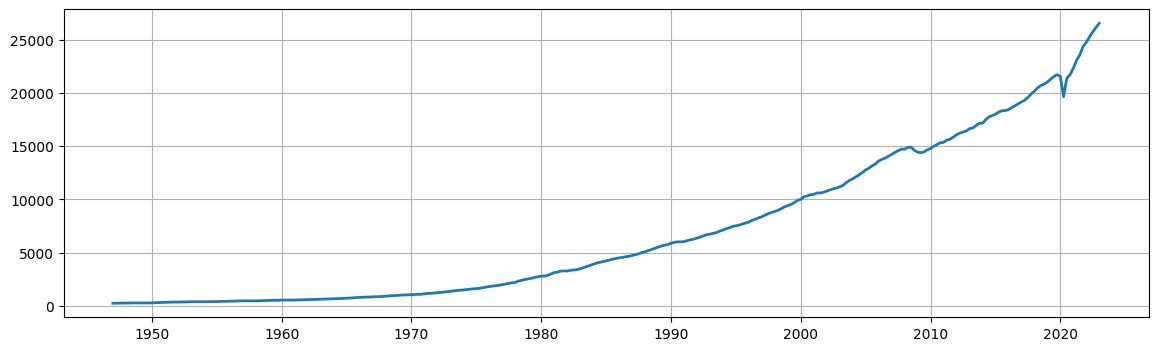

In [9]:
plt.plot(df['GDP'])

In [10]:
# or accessing directly from csv file
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id=GDP')
df.head(3).append(df.tail(3))

<ipython-input-10-e890c9f6279d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(3).append(df.tail(3))


,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
302,2022-07-01,25723.941
303,2022-10-01,26137.992
304,2023-01-01,26529.774


In [11]:
# new site for FRED
url = 'http://research.stlouisfed.org/fred2/series/GDP/downloaddata/GDP.csv'
df_gold = pd.read_csv(url)
df_gold.head(3).append(df_gold.tail(3))

<ipython-input-11-bec262db2e75>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gold.head(3).append(df_gold.tail(3))


,DATE,VALUE
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
302,2022-07-01,25723.941
303,2022-10-01,26137.992
304,2023-01-01,26529.774


<Axes: xlabel='DATE'>

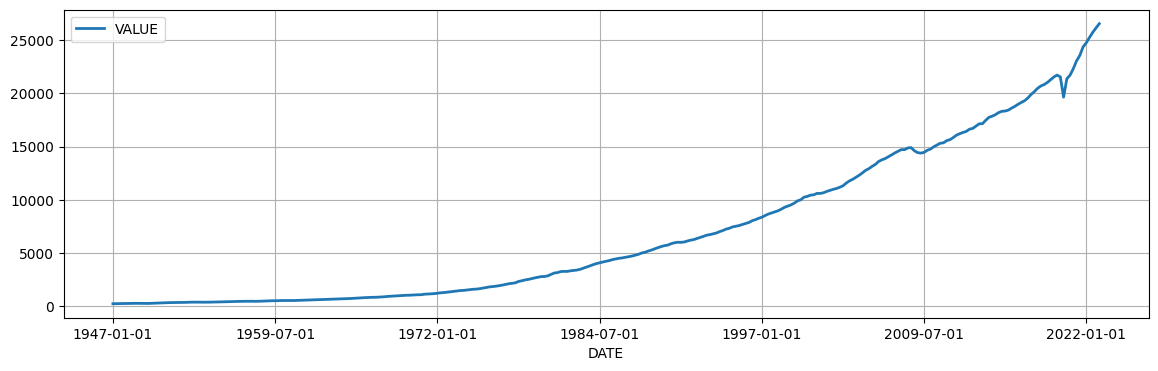

In [12]:
df_gold.plot('DATE', 'VALUE')

# 국제 은 가격
- Quandl: 캐나다 토론토의 데이터 공유 플랫폼 회사입니다(특히 금융 데이터): https://www.quandl.com
- "LBMA/SILVER", 런던 금시장협회 (LBMA) 은 가격

-  To access QUANDL,
  - (1)In order to retrieve data from quandl, you need to register for and input (via the parameter api_key or the environment variable QUANDL_API_KEY) a Quandl API key. Registering for a key can be done here (https://docs.quandl.com/docs#section-authentication).
  - (2) And also, you need to confirm the email message sent from quandl.

In [13]:
# 영국 은(silver)
API_KEY = 'NL_Uy8FexdtU3M6Zxb9a'
df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', access_key=API_KEY, start='2000-01-01')
df_silver.head(3).append(df_silver.tail(3))

<ipython-input-13-b26eb101f9cc>:3: FutureWarning: the 'access_key'' keyword is deprecated, use 'api_key' instead.
  df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', access_key=API_KEY, start='2000-01-01')
<ipython-input-13-b26eb101f9cc>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_silver.head(3).append(df_silver.tail(3))


,USD,GBP,EURO
Date,,,
2023-07-19,25.0150,19.36000,22.30000
2023-07-18,24.8850,18.97000,22.11000
2023-07-17,24.8100,18.97000,22.09000
2000-01-06,5.1400,3.11515,4.94231
2000-01-05,5.2850,3.22354,5.10135
2000-01-04,5.3025,3.23225,5.13808


<Axes: xlabel='Date'>

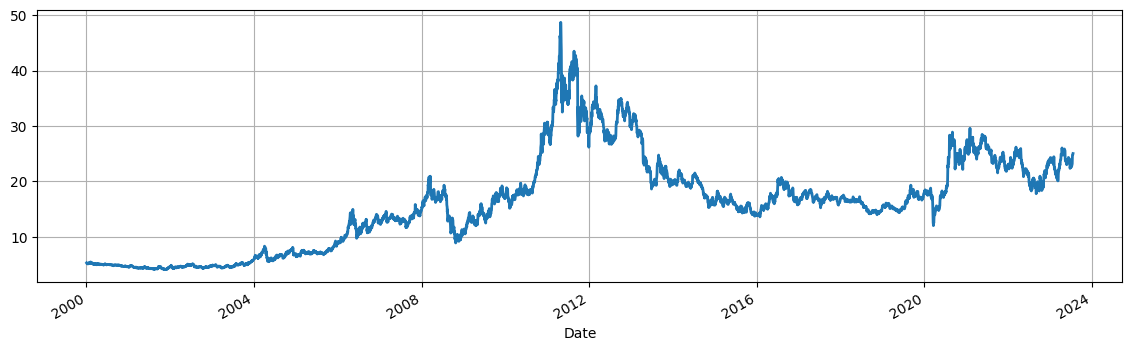

In [14]:
df_silver['USD'].plot()

# 국제 구리 가격
* 런던 금속 거래소(London Metal Exchange), 전 세계 비철금속거래의 지표
* Cash(현금가격), 3Months(3개월 선물가격), 15Months(15개월 선물가격) 등  

In [15]:
# LME 구리 가격
# df_copper = pdr.DataReader('LME/PR_CU', 'quandl', access_key='NL_Uy8FexdtU3M6Zxb9a', start='2000-01-01' )
# df_copper.tail(10)

# Quandl library 를 이용하는 방법
- 퀀들(Quandl)은 캐나다 토론토의 데이터 공유 플랫폼 회사
- 금융 데이터를 퀀들이 제공하는 API를 통해 손쉽게 제공받아 분석에 활용할 수 있다.
- 퀀들 API는 퀀들 웹 사이트에 접속 후 가입 절차를 완료한 후 api_key를 발급받아 이용할 수 있다.
- https://wooiljeong.github.io/python/data_collecting_tutorial/

In [16]:
!pip install quandl

In [17]:
import quandl

quandl.ApiConfig.api_key = 'NL_Uy8FexdtU3M6Zxb9a'
df_gold = quandl.get(dataset='LBMA/GOLD', start_date='2010-01-01', end_date='2022-09-01')
df_gold.head(3).append(df_gold.tail(3))

<ipython-input-17-7b568e248d29>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gold.head(3).append(df_gold.tail(3))


,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2010-01-04,1113.00,1121.50,686.825,693.483,774.261,777.470
2010-01-05,1125.25,1123.25,701.702,700.324,779.529,779.385
2010-01-06,1125.00,1130.00,702.774,708.020,783.317,786.579
2022-08-30,1734.00,1730.30,1475.810,1481.310,1726.370,1727.360
2022-08-31,1712.40,1715.90,1472.150,1478.080,1713.600,1715.210
2022-09-01,1706.00,1694.30,1471.080,1469.640,1701.740,1702.260


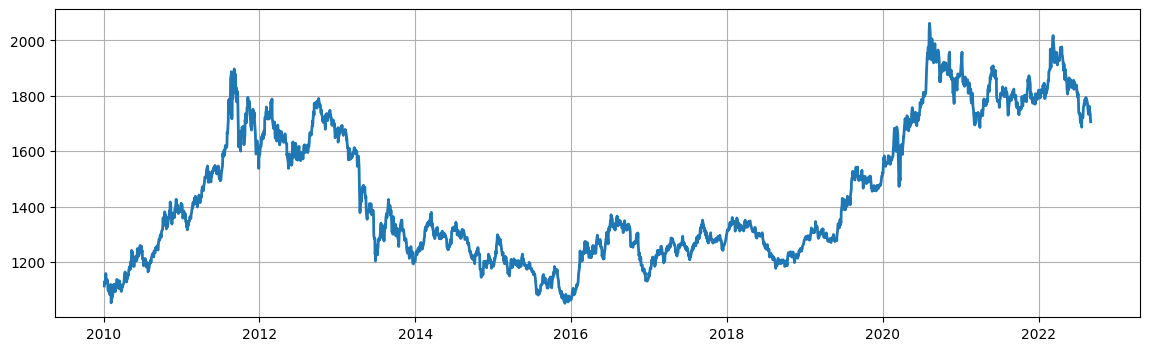

In [18]:
plt.plot(df_gold.iloc[:, 0])   # UsD

In [19]:
df_silver = quandl.get(dataset='LBMA/SILVER', start_date='2010-01-01', end_date='2022-09-01')
df_silver.head(3).append(df_silver.tail(3))

<ipython-input-19-19ea6616154b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_silver.head(3).append(df_silver.tail(3))


,USD,GBP,EURO
Date,,,
2010-01-04,17.170,10.5857,11.9319
2010-01-05,17.570,10.9744,12.1845
2010-01-06,17.890,11.1952,12.4669
2022-08-30,18.695,15.9500,18.6400
2022-08-31,17.945,15.4400,17.9800
2022-09-01,17.770,15.3700,17.7400


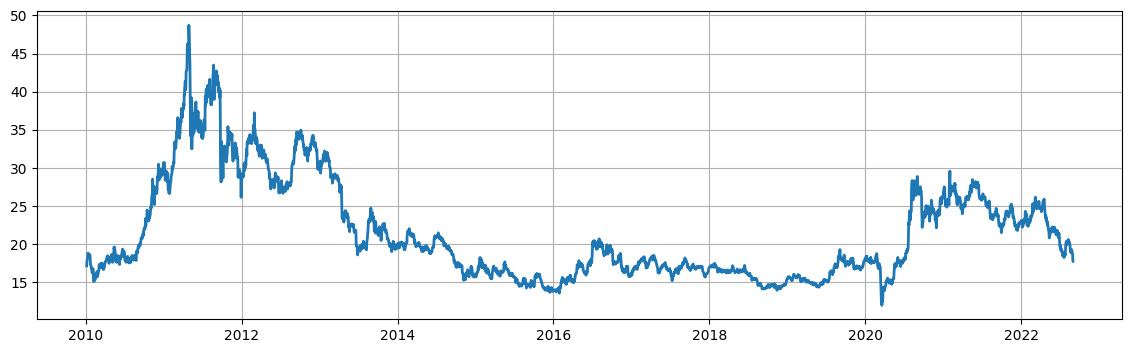

In [20]:
plt.plot(df_silver.iloc[:, 0])   # UsD

In [21]:
# Copper is not available at this time
# df_copper = quandl.get(dataset='LME/PR_CU', start_date='2010-01-01', end_date='2022-09-01')
# df_copper.head(3).append(df_copper.tail(3))

# 국제 원유 가격
국제 원유 가격을 대표하는 3대 유종이 있으며, 생산지와 대표적인 소비지역이 다르다.

1. 서부 텍사스 중질유 (POILWTIUSDM): 국제 원유가격을 대표
1. 두바이유 (POILDUBUSDM): 한국이 주로 수입(국내 유가에 영향)
1. 북해 브렌트유 (POILBREUSDM): 북해에서 생산, 유럽과 아프리카에서 소비

FRED 링크는 각각 다음과 같다.
- FRED stands for "Federal Reserve Economic Data," and it is an online database maintained and provided by the Federal Reserve Bank of St. Louis. FRED is one of the most comprehensive sources of economic and financial data available to the public.
* 서부 텍사스 중질유(WTI Crude):  https://fred.stlouisfed.org/series/POILWTIUSDM
* 두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
* 북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

In [27]:
# 서부 텍사스 중질유(WTI Crude), monthly
df_oil = pdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM'], 'fred', start='2000-01-01')
df_oil.head(3).append(df_oil.tail(3))

<ipython-input-27-3224254630e6>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oil.head(3).append(df_oil.tail(3))


,POILDUBUSDM,POILWTIUSDM
DATE,,
2000-01-01,23.359524,27.224286
2000-02-01,24.720000,29.362381
2000-03-01,25.096957,29.892174
2023-03-01,78.270870,73.348261
2023-04-01,83.408500,79.126500
2023-05-01,74.789130,71.673478


<Axes: xlabel='DATE'>

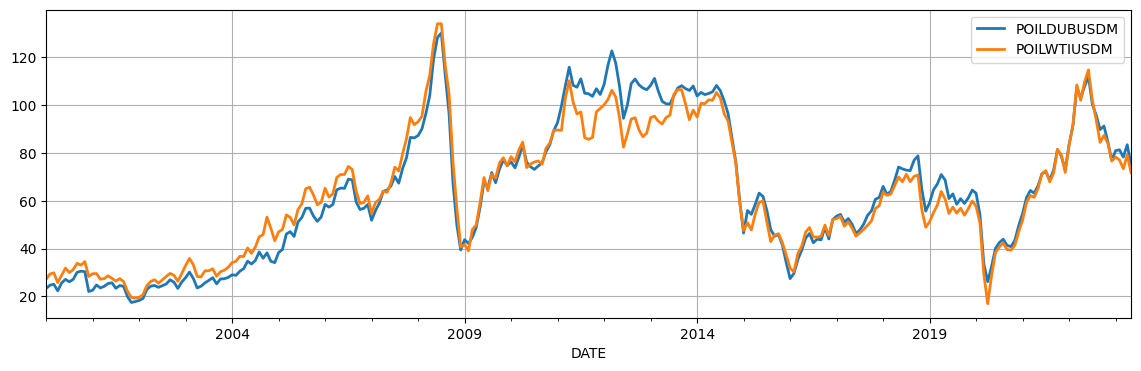

In [28]:
df_oil.plot()

## 두 가격의 차이
- 두 가격을 함께 놓고 보니, 두바이유와 서부 텍사스 중질유의 가격이 거의 같으나 약간 차이가 있다.

In [29]:
df_oil['diff'] = df_oil['POILDUBUSDM'] -  df_oil['POILWTIUSDM']
df_oil.tail(10)

,POILDUBUSDM,POILWTIUSDM,diff
DATE,,,
2022-08-01,95.693043,93.692609,2.000435
2022-09-01,89.742727,84.400000,5.342727
2022-10-01,91.214762,87.286667,3.928095
2022-11-01,84.599091,84.076364,0.522727
2022-12-01,76.855909,76.581818,0.274091
2023-01-01,80.905000,78.251364,2.653636
2023-02-01,81.275000,77.027500,4.247500
2023-03-01,78.270870,73.348261,4.922609
2023-04-01,83.408500,79.126500,4.282000


<Axes: xlabel='DATE'>

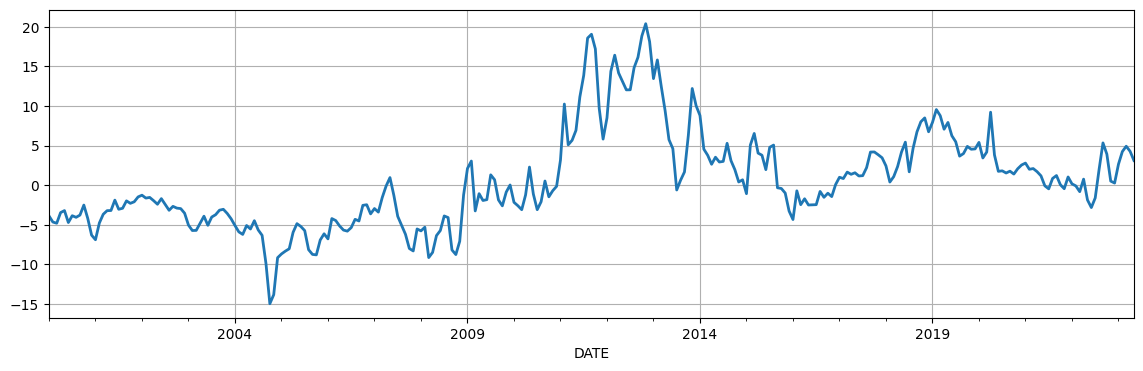

In [30]:
df_oil['diff'].plot()

가격의 차이를 좀 더 분명하게 표현해 보자. 0을 기준으로 낮으면 파란색, 높으면 빨간색으로 표시한다.
  - use plt.fill_between(): Fill the area between two horizontal curves. The curves are defined by the points (x, y1) and (x, y2).

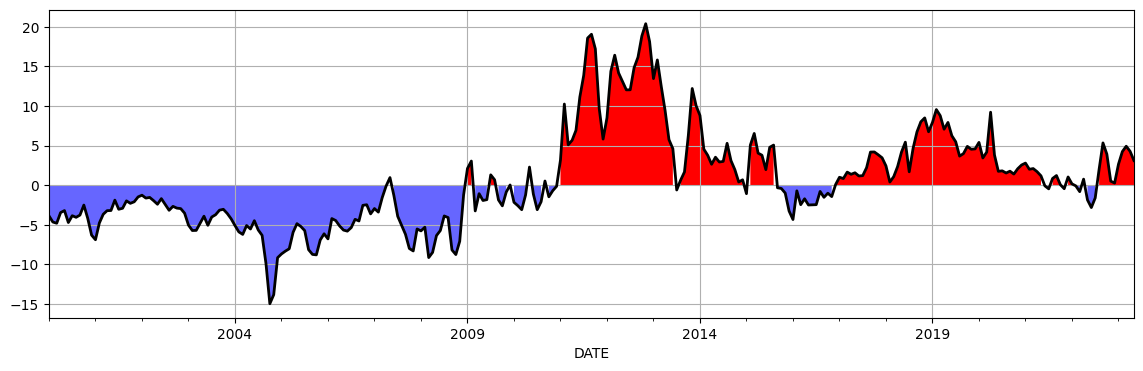

In [38]:
ax = df_oil['diff'].plot(color='k')

x = df_oil.index
y = df_oil['diff']

ax.fill_between(x, y1=0, y2=y, where=y > 0 , facecolor='r')
ax.fill_between(x, y1=0, y2=y, where=y <= 0, facecolor='b', alpha=0.6)